# Beer Consumption

**D1AED – Análise Estatística para Ciência de Dados**<br />
Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

# 0. Informações Gerais

## 0.1. Conhecendo  o dataset

A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Não sem razão, é perfeita para quase todas as situações, desde *happy hour* até grandes festas de casamento. Se você só de pensar, já tem vontade de tomar cerveja, você não está sozinho.

A verdade é que em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes situações. Mas você já parou para pensar em quais países mais se consume cerveja no mundo? O primeiro que te veio à cabeça foi a Alemanha? Bem, saiba que não é assim.

A resposta a essa pergunta é surpreendente: a República Tcheca. De acordo com pesquisa da empresa japonesa de bebidas Kirin, o país lidera a tabela de consumo de cerveja per capita há 23 anos consecutivos.

Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os checos beberam 142,4 litros por pessoa. Mas, dado que é improvável que menores de idade contribuam para esse número, é seguro supor que o bebedor de cerveja médio provavelmente consome um pouco mais.

Outros países euroupeus aparecem na lista, a Áustria e Alemanha estão em terceiro e quarto, Polônia em sexto e Irlanda em sétimo. No entanto, há algumas surpresas. Em segundo lugar estão as ilhas Seychelles, uma classificação elevada que atribuiremos ao clima quente e ao grande número de turistas.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (em média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo uma Meta, com período de um ano.

Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

## 0.2. Atributos:

* `Data`
* `Temperatura Média (°C)`
* `Temperatura Mínima (°C)`
* `Temperatura Máxima (°C)`
* `Precipitação (mm)`
* `Final de Semana (1 = Sim; 0 = Não)`
* `Consumo de Cerveja (litros)`

# 1. Importações

In [142]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurações de estilo dos gráficos
sns.set_theme(style='white', rc={'axes.titlesize': 18, 'axes.labelsize': 14, 'axes.grid.axis': 'y', 'figure.figsize': (20, 6)})
sns.set_palette("muted")

In [2]:
dados = pd.read_csv('Consumo_cerveja.csv')
dados.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


# 2. Pré-processamento

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [4]:
# Renomeando as colunas
dados.columns = dados.columns.str.replace(' ', '_').str.replace('[()]', '', regex=True).str.lower()
dados.columns

Index(['data', 'temperatura_media_c', 'temperatura_minima_c',
       'temperatura_maxima_c', 'precipitacao_mm', 'final_de_semana',
       'consumo_de_cerveja_litros'],
      dtype='object')

In [5]:
# Removendo linhas com todos valores nulos
dados.dropna(axis=0, how='all', inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       365 non-null    object 
 1   temperatura_media_c        365 non-null    object 
 2   temperatura_minima_c       365 non-null    object 
 3   temperatura_maxima_c       365 non-null    object 
 4   precipitacao_mm            365 non-null    object 
 5   final_de_semana            365 non-null    float64
 6   consumo_de_cerveja_litros  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [6]:
# Convertendo as colunas para os tipos corretos
dados = dados.replace({',': '.'}, regex=True).astype({
    'data': 'datetime64',
    'temperatura_media_c': 'float',
    'temperatura_minima_c': 'float',
    'temperatura_maxima_c': 'float',
    'precipitacao_mm': 'float',
    'final_de_semana': 'boolean',
    'consumo_de_cerveja_litros': 'float'
})

# Convertendo a coluna `final_de_semana` para tipo categórico
dados.final_de_semana = dados.final_de_semana.astype('category')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   data                       365 non-null    datetime64[ns]
 1   temperatura_media_c        365 non-null    float64       
 2   temperatura_minima_c       365 non-null    float64       
 3   temperatura_maxima_c       365 non-null    float64       
 4   precipitacao_mm            365 non-null    float64       
 5   final_de_semana            365 non-null    category      
 6   consumo_de_cerveja_litros  365 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(5)
memory usage: 20.4 KB


In [8]:
dados.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0.0,False,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28.900


# 3. Análise Exploratória

In [10]:
# Estatísticas descritivas
dados.describe().round(2)

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,consumo_de_cerveja_litros
count,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,25.40
std,3.18,2.83,4.32,12.42,4.40
min,12.90,10.60,14.50,0.00,14.34
25%,19.02,15.30,23.80,0.00,22.01
50%,21.38,17.90,26.90,0.00,24.87
75%,23.28,19.60,29.40,3.20,28.63
max,28.86,24.50,36.50,94.80,37.94


In [11]:
# Correlação
dados.corr().round(4)

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,consumo_de_cerveja_litros
temperatura_media_c,1.0000,0.8628,0.9225,0.0244,0.5746
temperatura_minima_c,0.8628,1.0000,0.6729,0.0986,0.3925
temperatura_maxima_c,0.9225,0.6729,1.0000,-0.0493,0.6427
precipitacao_mm,0.0244,0.0986,-0.0493,1.0000,-0.1938
consumo_de_cerveja_litros,0.5746,0.3925,0.6427,-0.1938,1.0000


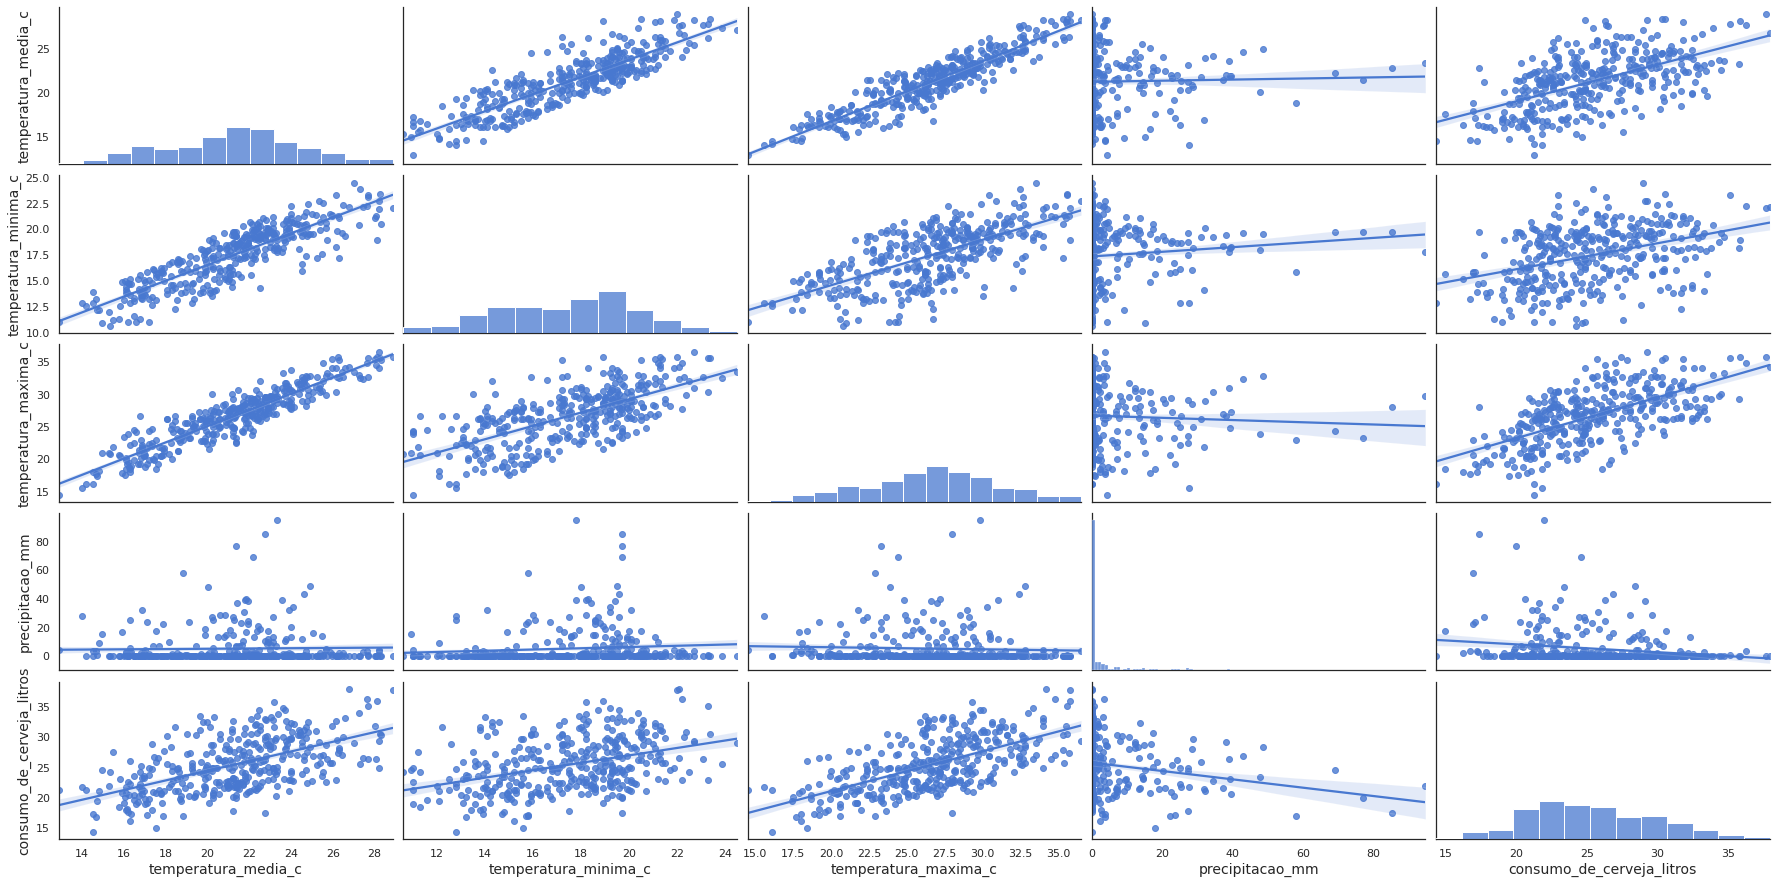

In [143]:
sns.pairplot(data=dados, kind='reg', aspect=2);

## 3.1. Consumo de cerveja

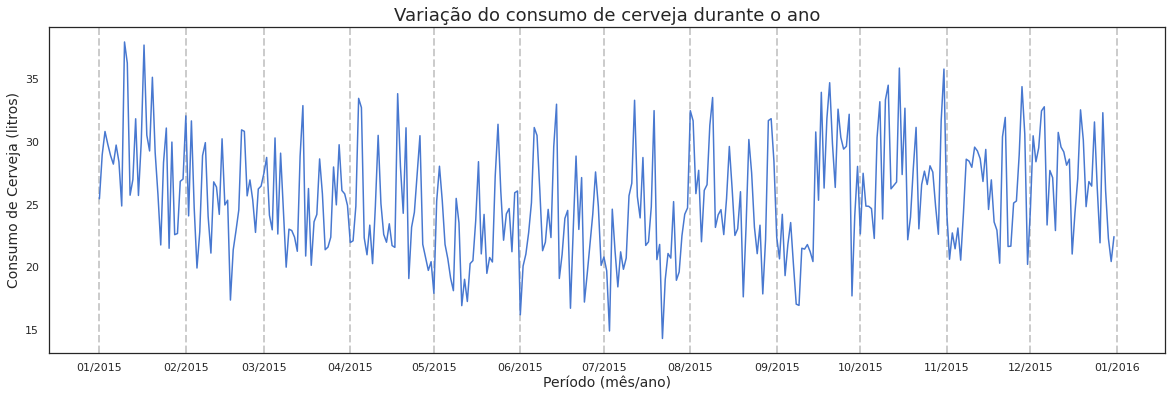

In [144]:
ax = sns.lineplot(data=dados, x='data', y='consumo_de_cerveja_litros')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

ax.set(title='Variação do consumo de cerveja durante o ano', xlabel='Período (mês/ano)', ylabel='Consumo de Cerveja (litros)')

plt.grid(axis='x', linestyle='--', linewidth=2)

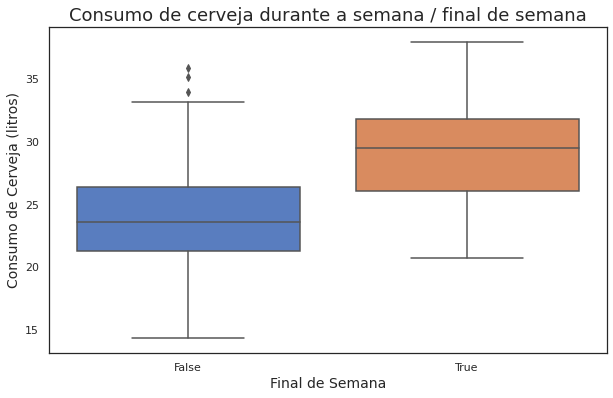

In [145]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=dados, y='consumo_de_cerveja_litros', x='final_de_semana')
ax.set(title='Consumo de cerveja durante a semana / final de semana', xlabel='Final de Semana', ylabel='Consumo de Cerveja (litros)');

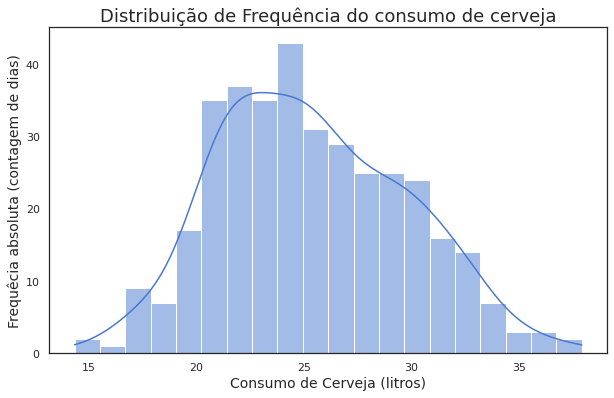

In [146]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=dados, x='consumo_de_cerveja_litros', bins=20, kde=True)
ax.set(title='Distribuição de Frequência do consumo de cerveja', xlabel='Consumo de Cerveja (litros)', ylabel='Frequêcia absoluta (contagem de dias)');

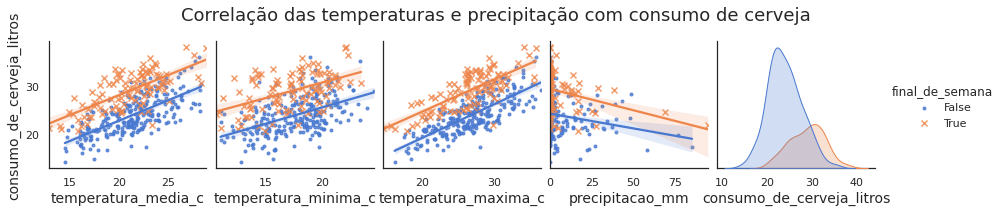

In [147]:
sns.pairplot(data=dados, y_vars='consumo_de_cerveja_litros', kind='reg', hue='final_de_semana', markers = ['.','x'])
plt.suptitle('Correlação das temperaturas e precipitação com consumo de cerveja', fontsize=18, y=1.15);

Text(0, 0.5, 'Temperatura')

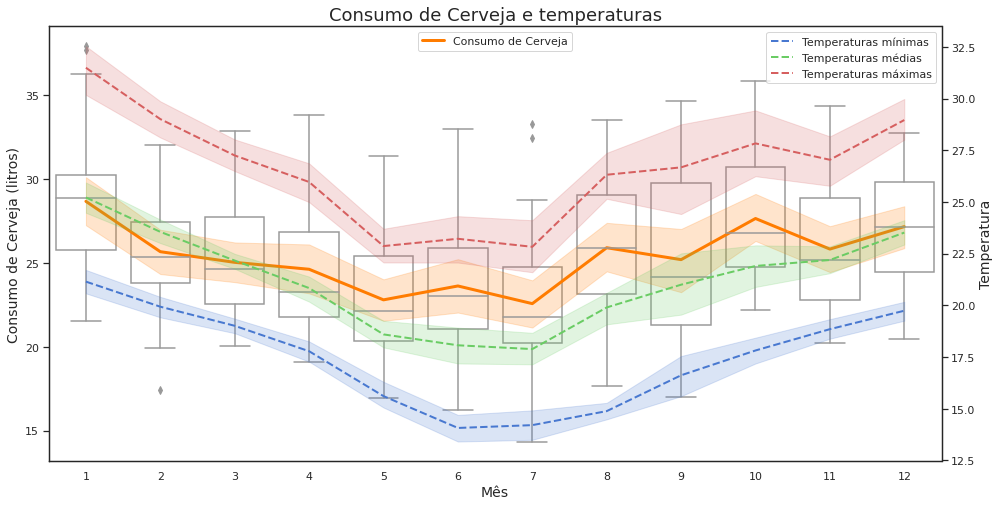

In [248]:
plt.figure(figsize=(16,8))

ax = sns.boxplot(data=dados, y='consumo_de_cerveja_litros', x=dados.data.dt.month, color='w')
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='consumo_de_cerveja_litros', label='Consumo de Cerveja', linewidth=3, color=sns.color_palette('bright')[1], ax=ax)
ax.set(title='Consumo de Cerveja e temperaturas', xlabel='Mês', ylabel='Consumo de Cerveja (litros)')
ax.legend(loc='upper center')

ax2 = ax.twinx()
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='temperatura_minima_c', label='Temperaturas mínimas', linewidth=2, linestyle='--', color=sns.color_palette()[0], ax=ax2)
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='temperatura_media_c', label='Temperaturas médias', linewidth=2, linestyle='--', color=sns.color_palette()[2], ax=ax2)
sns.lineplot(data=dados, x=dados.data.dt.month - 1, y='temperatura_maxima_c', label='Temperaturas máximas', linewidth=2, linestyle='--', color=sns.color_palette()[3], ax=ax2)
ax2.set_ylabel('Temperatura')

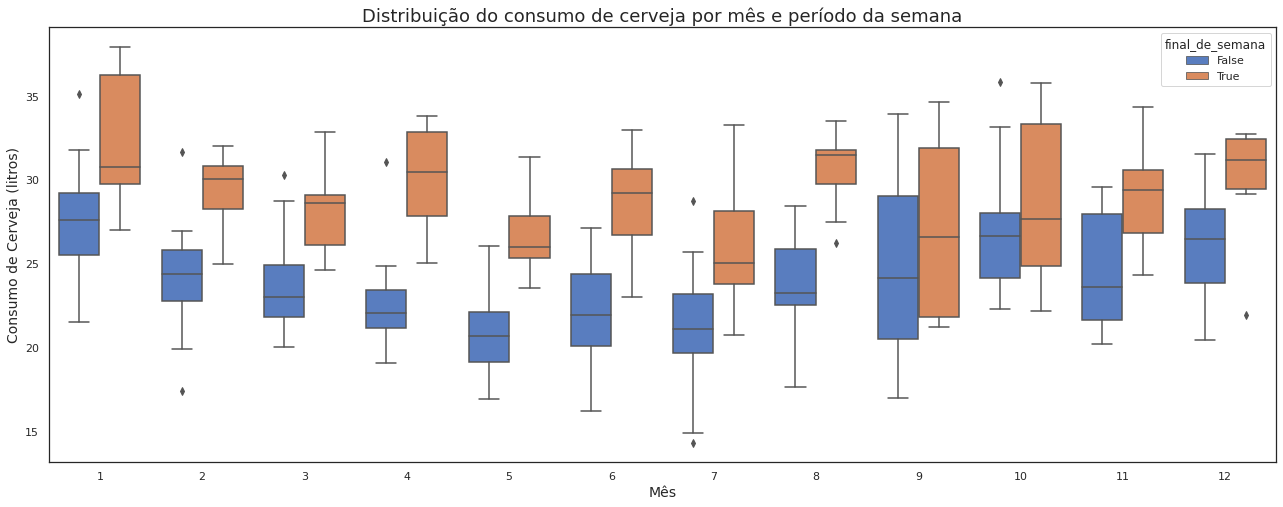

In [201]:
plt.figure(figsize=(22,8))
ax = sns.boxplot(data=dados, y='consumo_de_cerveja_litros', x=dados.data.dt.month, hue='final_de_semana')
ax.set(title='Distribuição do consumo de cerveja por mês e período da semana', xlabel='Mês', ylabel='Consumo de Cerveja (litros)');

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

## Regressão Linear

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [ ]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
X = dados[['temp_max','chuva','fds']]

## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [ ]:
X_train.shape

(255, 3)

In [ ]:
y_train.shape

(255,)

In [ ]:
X_test.shape

(110, 3)

In [ ]:
y_test.shape

(110,)

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print(f'R² modelo = {modelo.score(X_train, y_train).round(2)}')

R² modelo = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print('R² teste = %s' %metrics.r2_score(y_test, y_previsto).round(2))

R² teste = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0].round(2)

26094.9

## Criando um simulador simples

In [ ]:
temp_max = 40
chuva = 0
fds = 1

entrada = [[temp_max, chuva, fds]]

print(f'O consumo estimado de cerveja é de {modelo.predict(entrada)[0].round(2)} litros')

O consumo estimado de cerveja é de 38742.53 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [ ]:
modelo.intercept_

5951.976339312445

In [ ]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [ ]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [ ]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [ ]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [ ]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

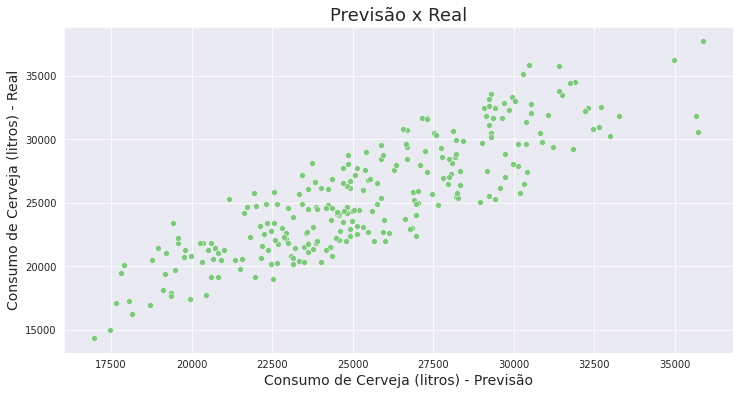

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize =14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize =14)
ax

## Obtendo os resíduos

In [ ]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

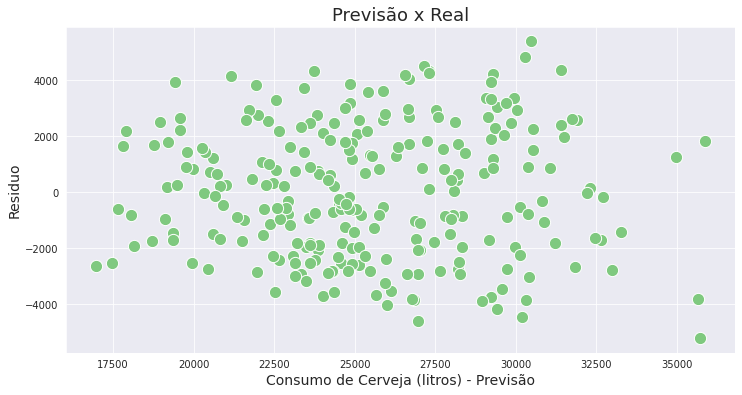

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo, s = 150)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize =14)
ax.set_ylabel('Residuo', fontsize =14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

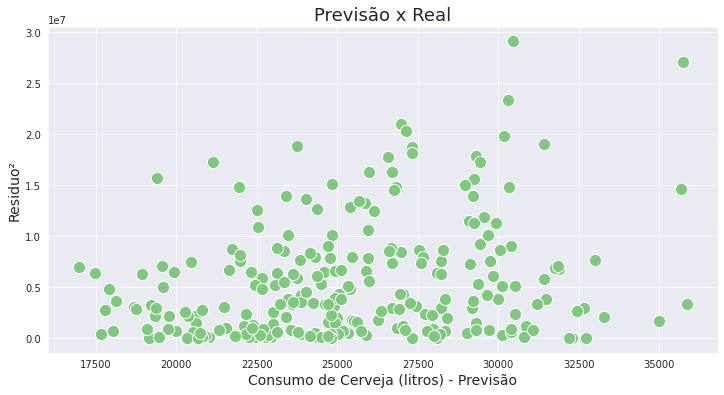

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s = 150)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize =14)
ax.set_ylabel('Residuo²', fontsize =14)
ax

## Plotando a distribuição de frequências dos resíduos

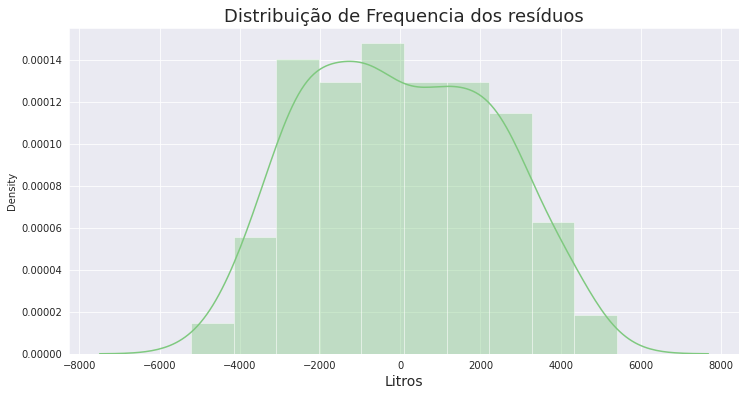

In [ ]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequencia dos resíduos', fontsize = 18)
ax.set_xlabel('Litros', fontsize =14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [ ]:
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.3, random_state = 2811)

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [ ]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [ ]:
print('Modelo com Temp. Média')
print(f'R² modelo = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com Temp. Média
R² modelo = 0.66


In [ ]:
print('Modelo com Temp. Máxima')
print(f'R² modelo = {modelo.score(X_train, y_train).round(2)}')

Modelo com Temp. Máxima
R² modelo = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [ ]:
y_previsto = modelo.predict(X_test)
y2_previsto = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [ ]:
print('Modelo com Temp. Média')
print('R² teste = %s' %metrics.r2_score(y2_test, y2_previsto).round(2))

Modelo com Temp. Média
R² teste = 0.66


In [ ]:
print('Modelo com Temp. Máxima')
print('R² teste = %s' %metrics.r2_score(y_test, y_previsto).round(2))

Modelo com Temp. Máxima
R² teste = 0.69


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [ ]:
EQM_2 = metrics.mean_squared_error(y2_test, y2_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_previsto).round(2))
R2_2 = metrics.r2_score(y2_test, y2_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

,Métricas
EQM,6.060775e+06
REQM,2.461864e+03
R²,6.600000e-01


## Obtendo métricas para o modelo com Temperatura Máxima

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto).round(2))
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

,Métricas
EQM,5.471976e+06
REQM,2.339226e+03
R²,6.900000e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [ ]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [ ]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print(f'O valor é: {modelo.predict(entrada)[0].round(2)}' )

O valor é: 26094.9


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [ ]:
import pickle

In [ ]:
output = open('Cursos\modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```